# Bank Churn Prediction 

### Objective: 
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 
        
### Points Distribution:
The points distribution for this case is as follows: 
    1. Read the dataset 
    2. Drop the columns which are unique for all users like IDs (5 points) 
    3. Distinguish the feature and target set (5 points) 
    4. Divide the data set into training and test sets (5 points) 
    5. Normalize the train and test data (10 points) 
    6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20) 
    7. Predict the results using 0.5 as a threshold (10 points) 
    8. Print the Accuracy score and confusion matrix (5 points)

## Importing necessary packages and defining custom functions

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

## Reusable libraries
def perform_initial_analysis(df):
    print("Datatype::\n",df.dtypes)
    print("\nShape::\n",df.shape)
    
def perform_missingvalues_analysis(df):
    print("Missing values:\n",df.isna().sum())
    
def perform_duplicate_analysis(df):
    # Check for duplicate data
    dups = df.duplicated()
    print('Number of duplicate rows = %d' % (dups.sum()))
    df[dups]
    
def perform_distribution_analysis(df):
    #Distribution Analysis - Gaussians exploration
    fig = plt.figure(figsize=(15, 40))
    for feature, num in zip(df.columns, range(1, len(df.columns) + 1)):
        ax = fig.add_subplot(10, 4, num)
        sns.distplot(df[feature])
    plt.tight_layout()
    plt.show()
    
def perform_outlier_analysis(df):
    plt.figure(figsize=(15,40))
    pos = 1
    for i in df.columns:
        plt.subplot(10,4, pos)
        sns.boxplot(df[i])
        pos += 1 
        
def perform_outlier_treatment(df):
    #Outlier treatment 
    for i in df.columns:
        q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
        IQR = q3 - q1
        a = df[i] > q3 + 1.5*IQR
        b = df[i] < q1 - 1.5*IQR
        df[i] = np.where(a | b, q2, df[i])

def calculate_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

def correlation_heatmap(dataframe,l,w):
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();

### Data Import

In [2]:
bank = pd.read_csv("bank.csv") 
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Dropping RowNumber and Surname as both columns look irrelevant
bank = bank.drop("RowNumber",axis = 1)
bank = bank.drop("Surname",axis = 1)

### Data Analysis

In [4]:
perform_initial_analysis(bank)

Datatype::
 CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Shape::
 (10000, 12)


In [5]:
# Comment


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
# Comment

In [9]:
for feature in bank.columns:
    print(bank[feature].value_counts())

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: B

In [10]:
# Missing value check
perform_missingvalues_analysis(bank)

Missing values:
 CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [11]:
# Comment

In [12]:
perform_duplicate_analysis(bank)

Number of duplicate rows = 0


In [13]:
# Comment
# There are no duplicates

In [14]:
#creating dummy variables for the categorical features
bank = pd.get_dummies(bank)
bank = bank.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
bank

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602.0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,15647311.0,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,15619304.0,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,15701354.0,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,15737888.0,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229.0,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,15569892.0,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,15584532.0,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,15682355.0,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


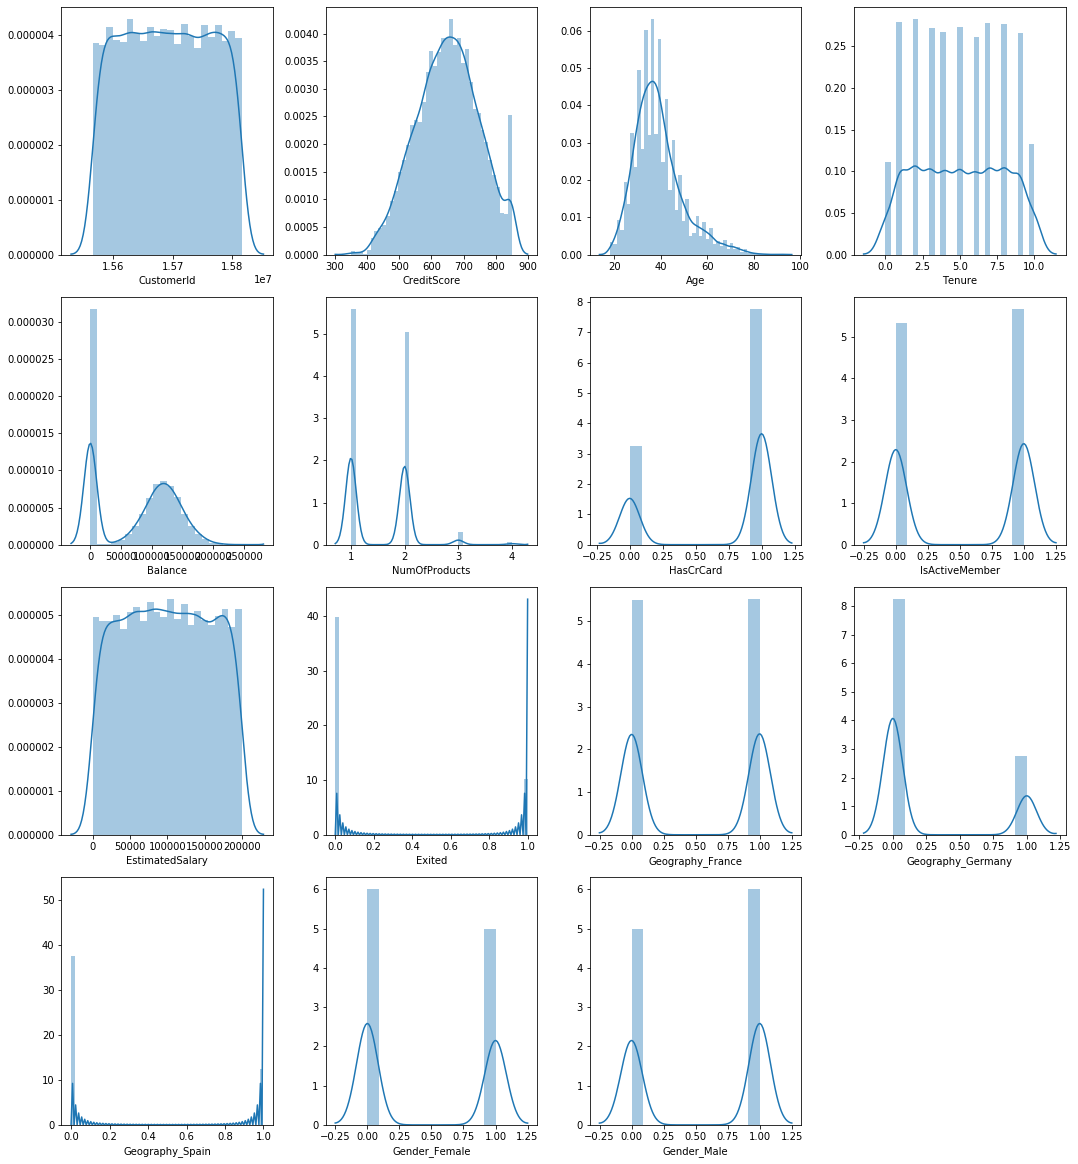

In [15]:
perform_distribution_analysis(bank)

In [16]:
# Comment

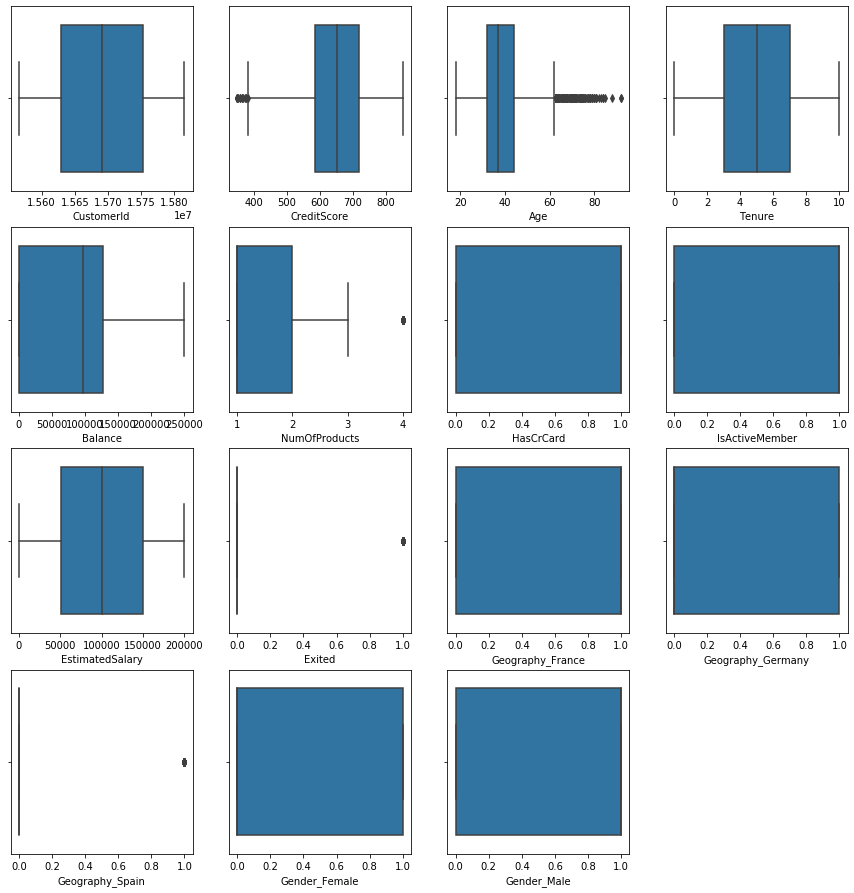

In [17]:
perform_outlier_analysis(bank)

### Correlation analysis

In [18]:
bankdf = bank.drop('Exited', axis=1)
cor = bankdf.corr(method='pearson')
cor

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.004049,-0.003097,0.007800,0.002641,-0.002641
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Geography_France,-0.004049,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.006772,0.006772


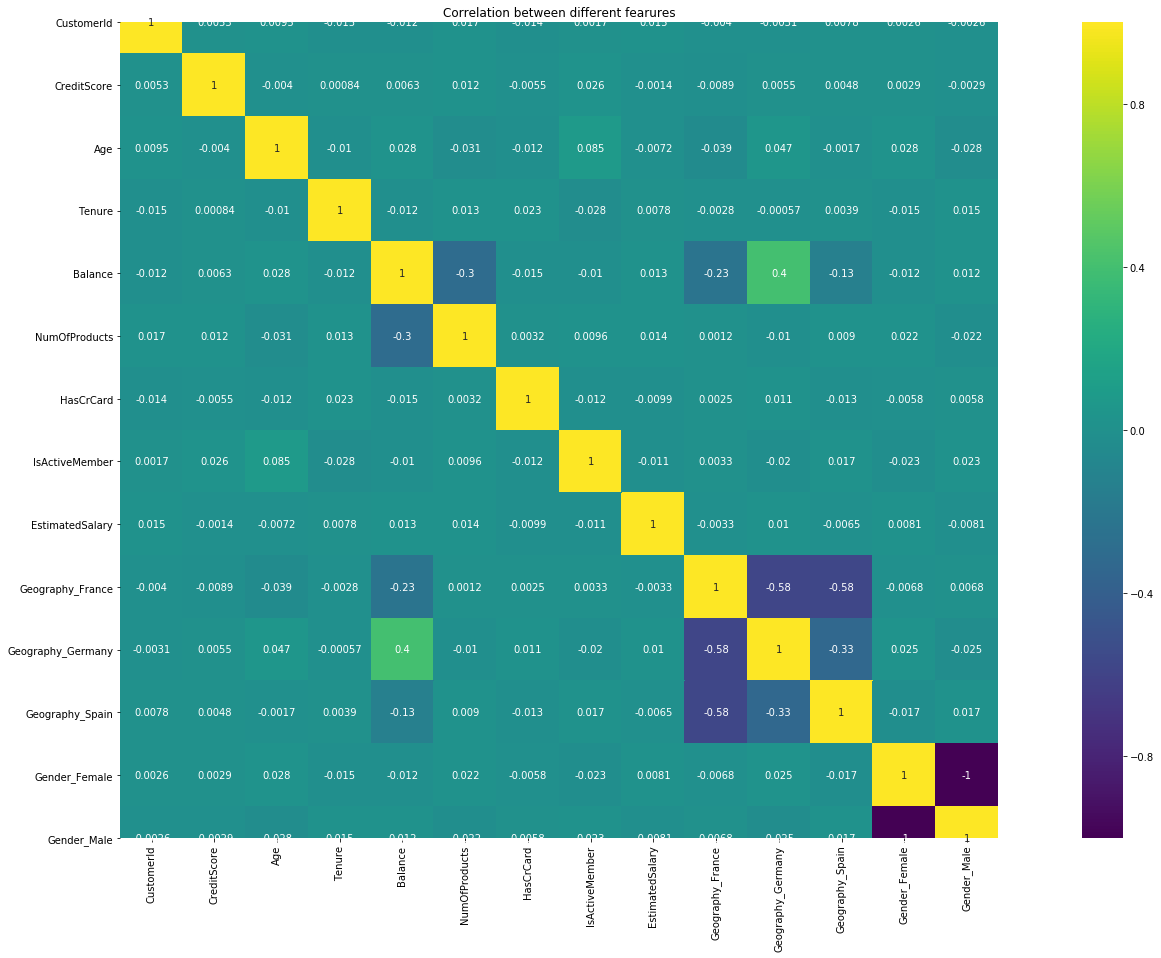

In [19]:
correlation_heatmap(bankdf, 30,15)

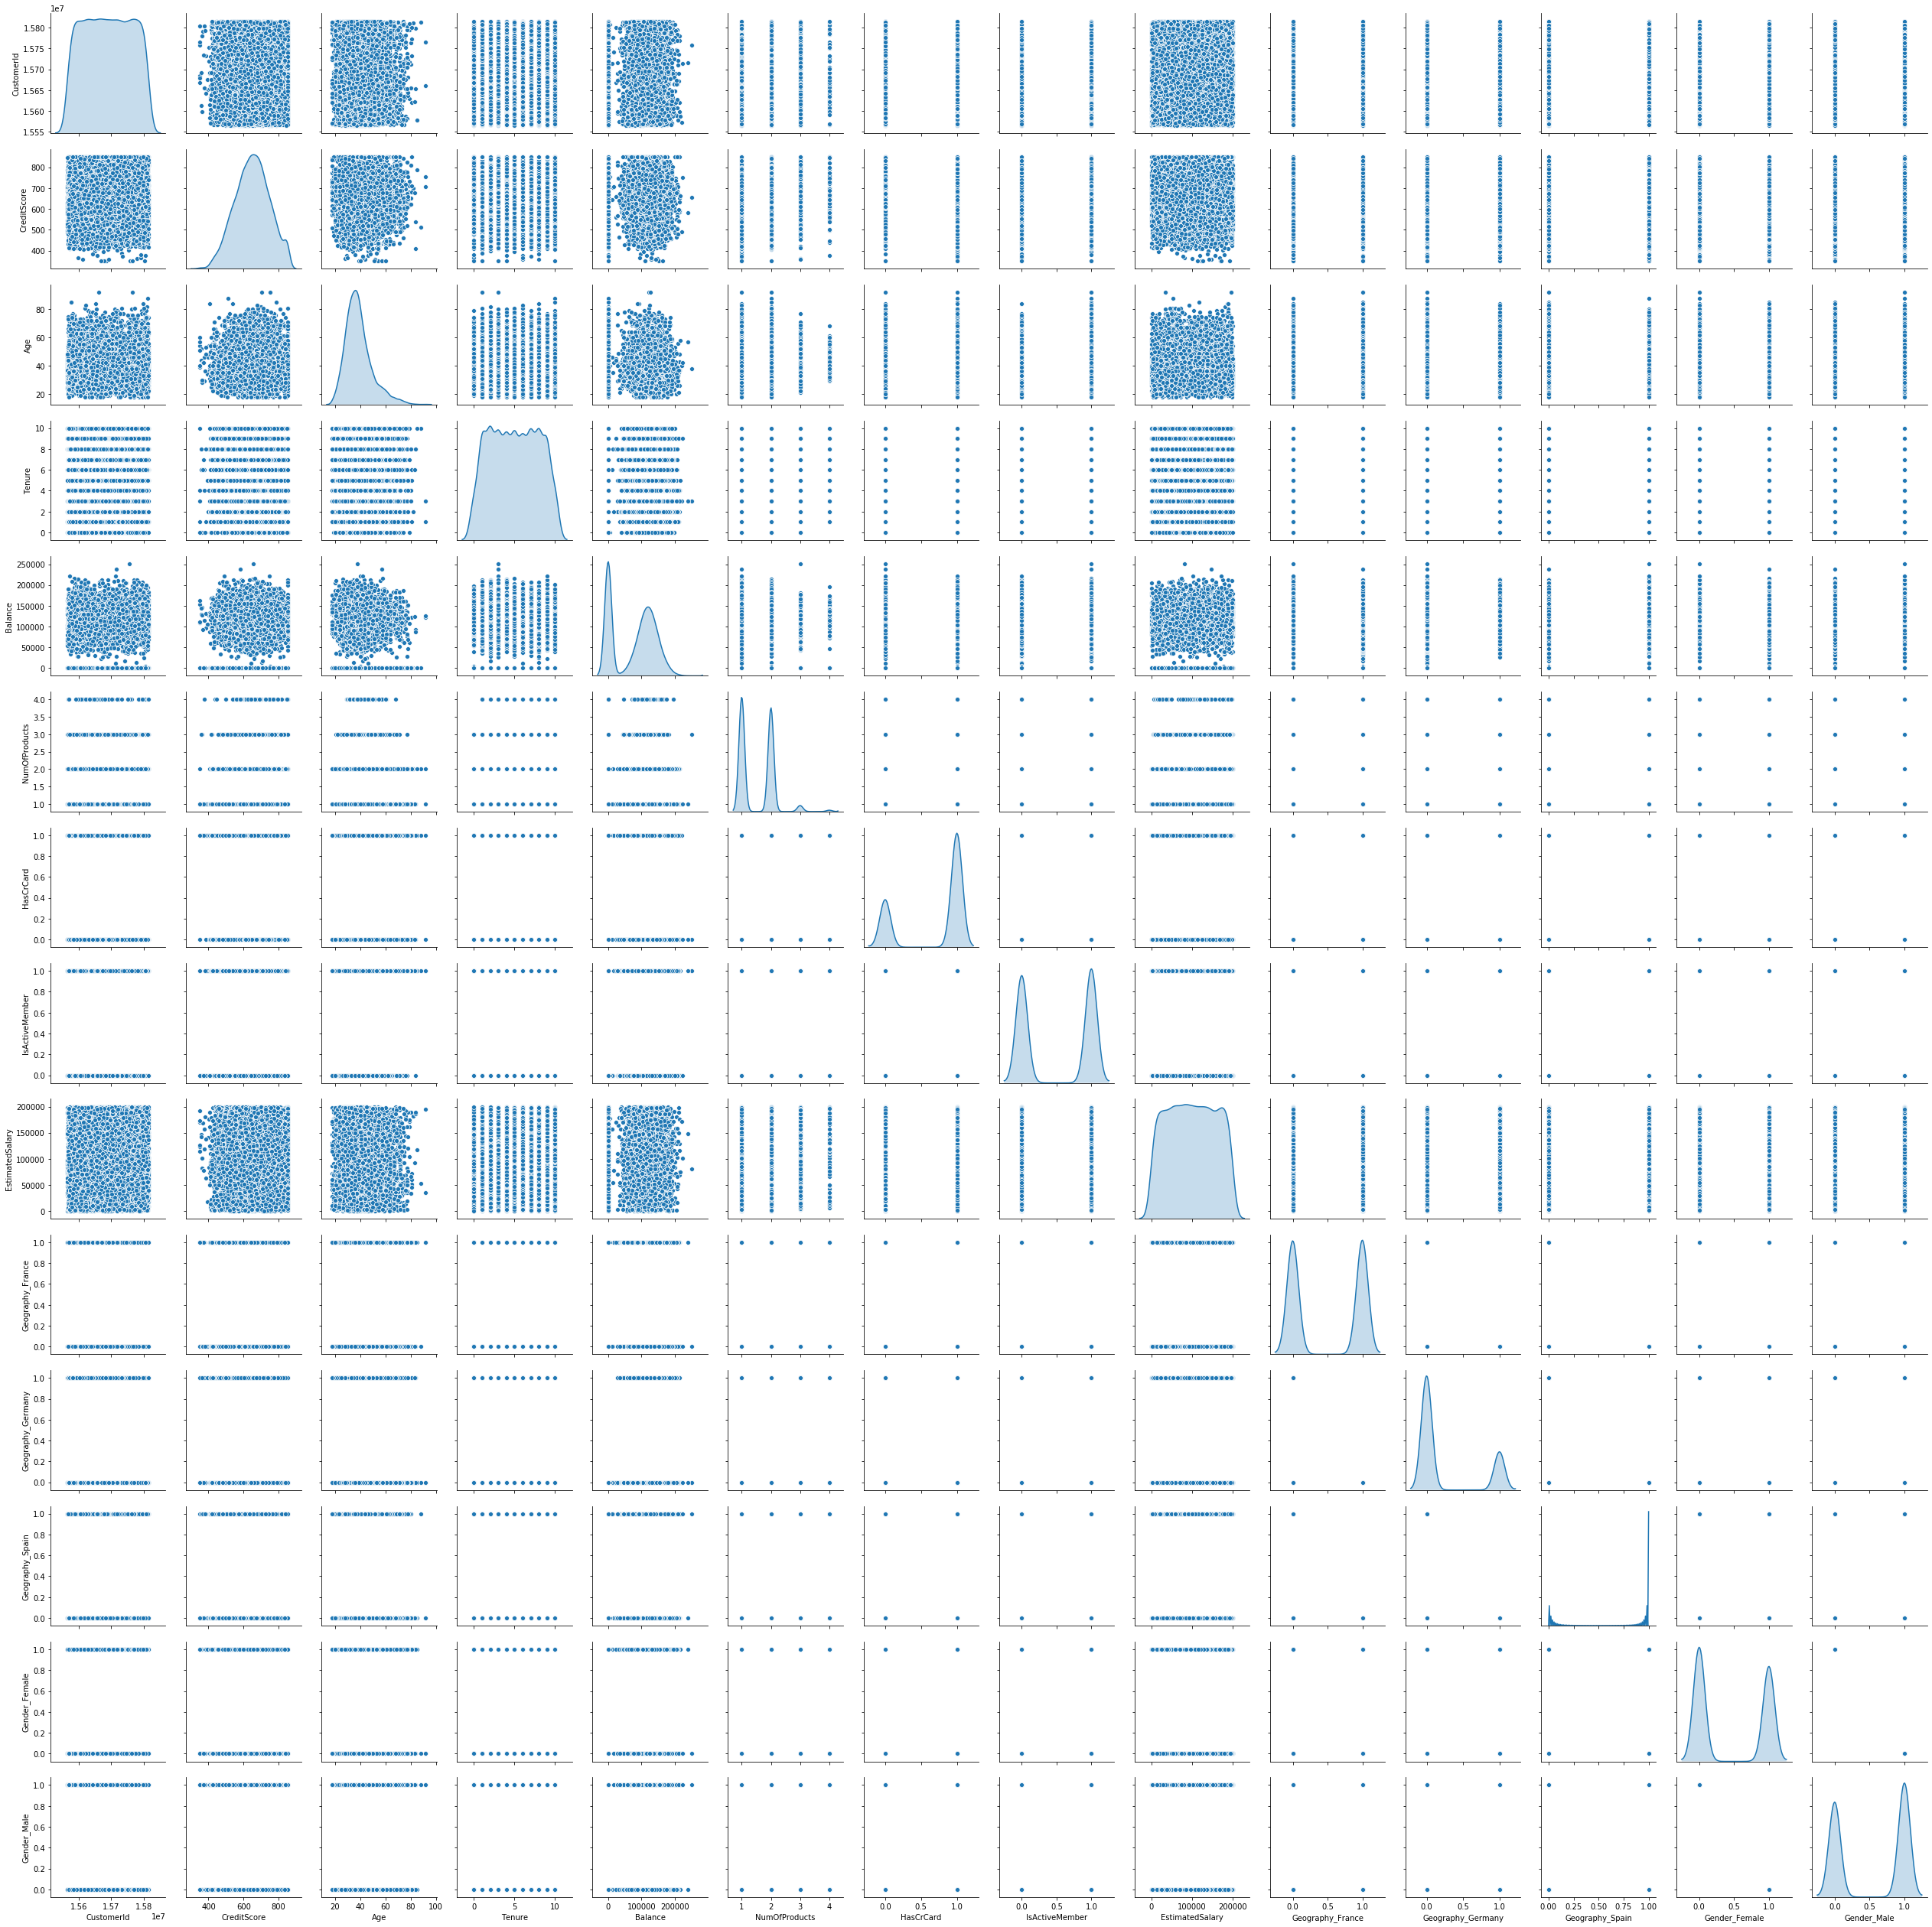

In [20]:
#Pair Plots
sns.pairplot(bankdf,diag_kind='kde')

In [21]:
# Comment

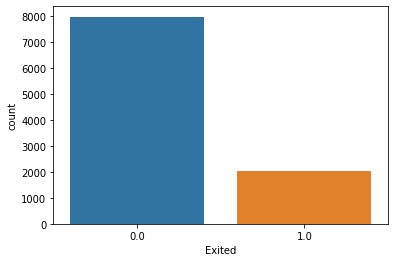

In [22]:
# Checking the group counts for class variable
bank['Exited'].value_counts()

splitscaledf = bank.copy()
sns.countplot(bank['Exited'])
plt.show()

In [23]:
#explorinfg column names
bank.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

### Data Prepartion

In [24]:
# Applying SVM on plain data

drop_cols = ['Exited']
v=bank
X_data = v.drop(labels=drop_cols,axis=1)
y_data = v['Exited']

In [25]:
X_data.shape

(10000, 14)

In [26]:
y_data.shape

(10000,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

### Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Normalizing the data

In [29]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 14)
(2000, 14)
(8000,)
(2000,)


### Creating a model
Keras model object can be created with Sequential class.
At the outset, the model is empty per se. It is completed by adding additional layers and compilation

In [31]:
model = Sequential()

### Adding layers [layers and activations]
Keras layers can be added to the model.
Adding layers are like stacking lego blocks one by one.
It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [32]:
model.add(Dense(64, input_shape = (14,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

### Model compile [optimizers and loss functions]
Keras model should be "compiled" prior to training.
Types of loss (function) and optimizer should be designated

In [33]:
sgd = optimizers.Adam(lr = 0.001)

In [34]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

### Summary of the mode

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

In [111]:
model.fit(X_train, y_train.values, batch_size = 700, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 311us/sample - loss: 0.6445 - accuracy: 0.7134
Epoch 2/10
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5548 - accuracy: 0.7968
Epoch 3/10
8000/8000 [==============================] - 0s 18us/sample - loss: 0.5079 - accuracy: 0.7968
Epoch 4/10
8000/8000 [==============================] - 0s 17us/sample - loss: 0.4864 - accuracy: 0.7968
Epoch 5/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.4726 - accuracy: 0.7968
Epoch 6/10
8000/8000 [==============================] - 0s 17us/sample - loss: 0.4620 - accuracy: 0.7968
Epoch 7/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.4535 - accuracy: 0.7975
Epoch 8/10
8000/8000 [==============================] - 0s 18us/sample - loss: 0.4467 - accuracy: 0.8006
Epoch 9/10
8000/8000 [==============================] - 0s 18us/sample - loss: 0.4408 - accuracy: 0.8048
Epoch 10/10
8000/8000 [=========

### Evaluation
Keras model can be evaluated with evaluate() function.
Evaluation results are contained in a list.

In [113]:
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [114]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.42738156509399416, 0.8105]


### Confusion Matrix

In [115]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1 (Dropout): 0.8105
Recall_score: 0.13381995133819952
Precision_score: 0.7051282051282052
F-score: 0.22494887525562374


array([[1566,   23],
       [ 356,   55]], dtype=int64)